# Cargando las librerias requeridas

In [1]:
import pandas as pd
import plotnine as ptn

# Cargando datos

In [2]:
from sklearn import datasets

# Cargando el dataset de vino
wine = datasets.load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


# Preparando datos

In [3]:
# Escalando los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X = wine.data)

# Clase DBScan

## Existen múltiples parámetros para el modelo DBScan

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

``` python
modelo_DBSCAN = DBSCAN(eps         = 0.5,
                       min_samples = 5,
                       metric      = 'euclidean')
```
donde:

- `eps`: radio de la esfera n-dimensional para la cual se buscan los minPoints.
- `min_samples` (minPts): número mínimo de puntos dentro de la región definida por eps para considerar a un punto como crítico (el punto a analizar también se cuenta).
- `metric`: métrica para el cálculo de la distancia

Para la distancia, podemos usar:
- `scikit-learn`: cityblock, cosine, euclidean, manhattan
- `scipy.spatial.distance`: chebyshev, correlation, hamming, jaccard, mahalanobis, minkowski, seuclidean, sqeuclidean

## Existen múltiple métodos/funciones para el modelo DBScan

- Entrena el modelo con los parametros asignados.
``` python
modelo_DBSCAN.fit(X = data)
```

- Entrena y devuelve los clusters encontrados con los parametros asignados (no sirve para predecir el cluster de nuevas observaciones).
``` python
modelo_DBSCAN.fit_predict(X = data)
```
## Caracteristicas del modelo entrenado

Una vez entrenado el modelo, existen nuevas características que podemos observar (atributos)

- `core_sample_indices_`: indices de puntos core.
- `components_`: Copia de los puntos core.
- `labels_`: etiquetas de los puntos (-1 implica outlier/noise (N)).

### Ajustando (entrenando) el modelo

In [4]:
# Creando un objeto de DBSCAN con las condiciones iniciales
from sklearn.cluster import DBSCAN

DBScan = DBSCAN(eps         = 2,
                min_samples = 5,
                metric      = 'euclidean')

# Entrenando el modelo
DBScan = DBScan.fit(X = scaled_features)

# Mostrando las clases aprendidas
print(DBScan.labels_) 

[ 0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0  1 -1  1  1  1  1  1 -1 -1 -1
 -1  0 -1 -1 -1  0  0  0  0 -1  0  1  0 -1 -1  0 -1  1  0 -1  0  0 -1 -1
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  2  2  2 -1 -1 -1 -1 -1  3  3 -1  3 -1
 -1 -1 -1  4  4 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  4  3  3  2  4 -1 -1  4
 -1 -1  2  4  4 -1  4 -1 -1 -1]


In [5]:
# Mostrando los puntos CORES (observar que varios puntos no fueron considerados)
print(DBScan.core_sample_indices_) 

[  5   6   9  11  12  15  17  20  22  23  24  26  27  29  31  34  35  37
  38  40  44  47  48  49  52  53  54  56  57  58  81  85  88  90  91 102
 104 106 116 125 131 140 142 148 162 164]


### Aplicando PCA para visualizar (interpretar) clusters

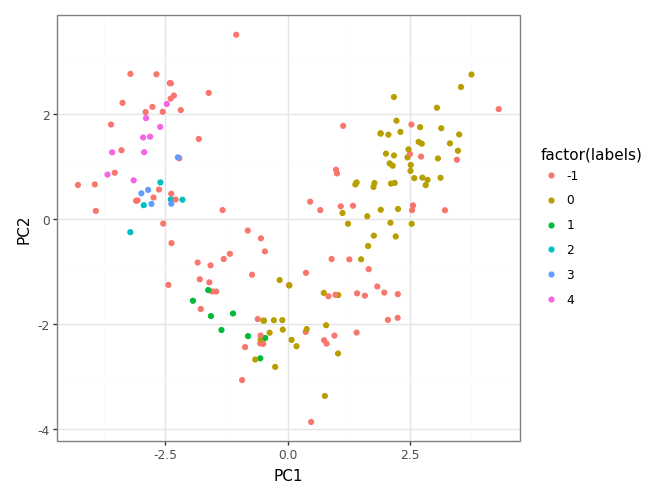

In [6]:
# Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(X = scaled_features)

pca_scaled_features_df = pca.transform(X = scaled_features)
pca_scaled_features_df = pd.DataFrame(data    = pca_scaled_features_df,
                                      columns = ["PC1", "PC2"])
pca_scaled_features_df["labels"] = DBScan.labels_

(
    ptn.ggplot(data = pca_scaled_features_df) + 
    ptn.aes(x = "PC1", y = "PC2", color = "factor(labels)") + 
    ptn.geom_point() +
    ptn.theme_bw()
)

# Buscando el "Mejor" valor para eps

# Clase NearestNeighbors

Para calcular las distancias de los vecinos se utiliza la clase `sklearn.neighbors.NearestNeighbors`

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

``` python
modelo_NearestNeighbors = NearestNeighbors(n_neighbors = 5,
                                           metric      = 'minkowski',
                                           p           = 2)
```
donde:

- `n_neighbors`: Números de vecinos a estimar.
- `metric`: métrica para el cálculo de la distancia.
- `p`: parámetro de la distancia de minkowski (2 es euclideana).

## Existen múltiple métodos/funciones para el modelo NearestNeighbors

- Encontrar los vecinos más cercanos de los datos.
``` python
modelo_NearestNeighbors.fit(X = data)
```

- Encontrar los K vecinos más cercano de un punto, retorna tanto los índices como la distancia.
``` python
modelo_NearestNeighbors.kneighbors(X, n_neighbors)
```

- Encontrar los vecinos de uno o más puntos que se encuentran dentro de un radio determinado.
``` python
modelo_NearestNeighbors.radius_neighbors(X, radius)
```

# Caracteristicas del modelo entrenado

Una vez ajustado el modelo, existen nuevas características que podemos observar (atributos)

- `effective_metric_`: métrica usada para el cálculo de la distancia.
- `effective_metric_params_`: Parámetros de la métrica usada para el cálculo de la distancia.
- `n_samples_fit_`: número de puntos del dataset.

In [7]:
from sklearn.neighbors import NearestNeighbors

numNeighboors = 4

# Creando el modelo
neighbors = NearestNeighbors(n_neighbors = numNeighboors)

# "Entrenando" el modelo
neighbors_fit = neighbors.fit(X = scaled_features)

# "Buscando los vecinos más cercanos"
distances, indices = neighbors_fit.kneighbors(X = scaled_features)
distances = distances[:, numNeighboors-1]
distances.sort()
distances

array([1.47168498, 1.47535465, 1.47802728, 1.52478465, 1.52967026,
       1.54958034, 1.56072685, 1.56091658, 1.58253071, 1.58667529,
       1.59350367, 1.60500926, 1.61603886, 1.61756477, 1.61756477,
       1.64590051, 1.65518644, 1.67305232, 1.67624636, 1.67844093,
       1.71213139, 1.71213139, 1.73352584, 1.73352584, 1.73803859,
       1.74274627, 1.74697116, 1.75068592, 1.7537641 , 1.75757735,
       1.758773  , 1.76460441, 1.76460441, 1.76718549, 1.80061388,
       1.80172404, 1.81522131, 1.81728033, 1.81728033, 1.82668367,
       1.82724497, 1.83127383, 1.8325489 , 1.83538281, 1.83772688,
       1.84444595, 1.84452915, 1.85154556, 1.85651213, 1.85812561,
       1.86519441, 1.8798772 , 1.88283519, 1.88633349, 1.90374006,
       1.90507098, 1.91016661, 1.91835868, 1.9254778 , 1.94391001,
       1.95680606, 1.96645865, 1.96783018, 1.96947714, 1.97282443,
       1.97297557, 1.97555117, 1.97563113, 1.97592574, 1.98374143,
       1.98507584, 1.99201144, 1.99321349, 1.99695325, 2.00367

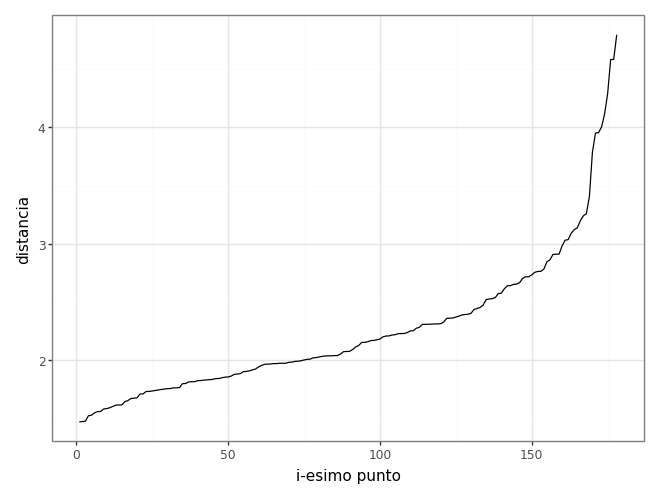

In [8]:
distances_df = pd.DataFrame(data    = range(1, len(distances) + 1),
                            columns = ["puntos"])

distances_df["dist"] = distances

(
    ptn.ggplot(data = distances_df) +
    ptn.aes(x = "puntos", y = "dist") +
    ptn.theme_bw() +
    ptn.geom_line() +
    ptn.labs(y = "distancia", x = "i-esimo punto")
)

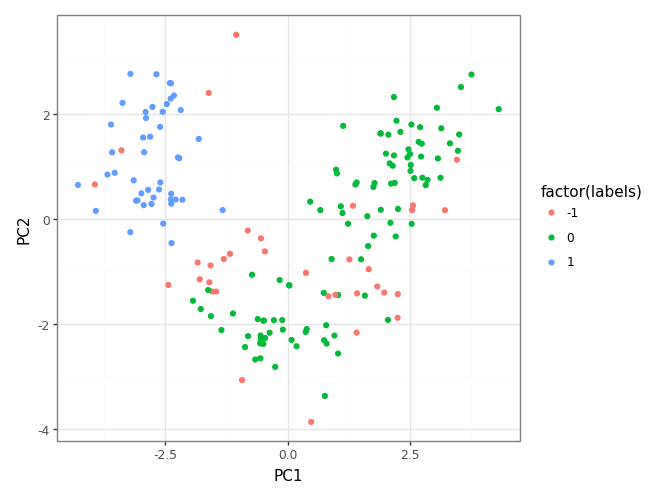

In [9]:
# Creando un objeto de DBSCAN con las condiciones iniciales
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps         = 2.4005,
            min_samples = 5,
            metric      = 'euclidean')

DB = DB.fit(X = scaled_features)

pca = PCA(n_components = 2)

pca.fit(X = scaled_features)

df = pca.transform(X = scaled_features)
df = pd.DataFrame(data    = df,
                  columns = ["PC1", "PC2"])
df["labels"] = DB.labels_
(
    ptn.ggplot(data = df) +
    ptn.aes(x = "PC1", y = "PC2", color = "factor(labels)") +
    ptn.geom_point() + 
    ptn.theme_bw()
)